
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

* Adriano Antonello
* Gabriel Delgado
* Pablo Casas
* Augusto Lobelos

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset



In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

------------------------------------------------------


In [ ]:
#El objetivo de este proyecto es aprender la metodología utilizada para 
#analizar los lengueajes de programación asociados a los mejores salarios . 
#El dataset incluye información pertinente a una encuesta realizada a distintos 
#programadores y desarrolladores de software.

1.1

A continuación se presenta una breve descripcio del set de datos


In [ ]:
# Número de filas del DF
len(df)

In [ ]:
# Nombres de las columnas
df.columns

In [ ]:
# print información general del DF
df.info()

OBSERVACIONES:
El DF contiene:

2.2 MB
filas = 6095
columnas = 47
datos de tipo: float64, int64, object

In [ ]:
#1. Seleccionar las columnas relevantes para analizar.

In [ ]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO','salary_monthly_BRUTO','profile_age','profile_studies_level']
df_sel_col=df[relevant_columns]
df_sel_col[:3]



1.2

In [ ]:
#2 Seleccionar las filas relevantes para analizar

In [ ]:
# descripción de los principales estadísticos descriptivos
df_sel_col.describe()

1.2


Para nuestro análisis vamos a tener en cuenta el salario Neto ya que representa el dinero que realmente dispone el trabajador luego de que se le realizan las retenciones (como obra social y aportes jubilatorios).


In [ ]:
# Histogramas de salary_monthly_NETO

col = "salary_monthly_NETO"
#sub_df = df[df[col] < max_val]
fig, ax = plt.subplots(figsize=(12,6))

seaborn.histplot(df_sel_col[col], kde=True, bins=100, color='red', stat= 'density')

#seaborn.histplot(sub_df[col], kde=True, bins=100, color='red', stat= 'density')

El histograma de la variable "salary_monthly_Neto" muestra una distribución no simétrica, desplazada hacia valores positivos. Se extiende hasta 2.08 millones.

Se plantea observar el diagrama de cajas para detenerminar el comportamiento salary_monthly_Neto

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
seaborn.boxplot(df_sel_col["salary_monthly_NETO"], color="red")

In [ ]:
#Nos quedamos con el 95% de los salarios Neto mas bajos, eliminamos el 5%
k = 95
percentile_95 = df_sel_col[col].quantile(k / 100)
n_below = len(df_sel_col[df_sel_col[col] < percentile_95])
n_above = len(df_sel_col[df_sel_col[col] > percentile_95])
print('Percentil {} de la columna {}: {}'.format(k, col, percentile_95))
print('% de datos menor que percentil {}: {}'.format(k, n_below / len(df)))
print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(df)))

In [ ]:
df_filtrados=df_sel_col[df_sel_col[col] < percentile_95]
df_filtrados[:3]


In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
seaborn.boxplot(df_filtrados["salary_monthly_NETO"], color="red")

In [ ]:
df_filtrados.tools_programming_languages[:3]

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df_filtrados.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:2]

En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count

In [ ]:
#aqui la idea es poder decidir los lenguajes y poder graficar la frencuencia.

plt.xticks(rotation=90)
seaborn.barplot(x='language',y='frequency',data=language_count)

In [ ]:
language_count.frequency.describe()

In [ ]:
#Del gráfica anterior estime un corte en 500
plt.xticks(rotation=90)
seaborn.barplot(x='language',y='frequency',data=language_count[language_count['frequency']>500])

## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [ ]:
#aplico el filtro para quedarme con los lenguajes que deseo
language_filter=language_count[language_count['frequency']>500]['language']
language_filter

In [ ]:
# Filter out languages that we want to exclude
# Complete here with your selected list.

interesting_languages =language_filter #filtrado según los lenguajes que le indicamos en la lista anterior
                                       #s
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang

In [ ]:
#me quedo con los salarios mayor al salario mínimo, vital y móvil 21600
datos_filtrado=filtered_df_lang[filtered_df_lang['salary_monthly_NETO']>21600]
datos_filtrado[:2]

In [ ]:
#aquí la idea es poder ver la media de los salario con respecto los lenguaje de pogramación.
fig = plt.figure(figsize=(16,6))
seaborn.barplot(y=datos_filtrado['salary_monthly_NETO'], x=datos_filtrado['programming_language'],
               
                estimator=numpy.mean, ci=None)
plt.xticks(rotation=45)
plt.ylabel("Media de salario mensual NETO")
plt.xlabel("lenguaje de programación")
plt.ticklabel_format(style='plain', axis='y')

# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)
df[:4]

In [ ]:
#c_r= ['tools_programming_languages', 'salary_monthly_NETO']
#c_r = ['tools_programming_languages', 'salary_monthly_NETO','salary_monthly_BRUTO','profile_age','profile_studies_level','`p']
#seaborn.distplot(df[df.profile_age <100].salary_monthly_NETO)

In [ ]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO','salary_monthly_BRUTO','profile_age','profile_studies_level',	'profile_gender']
df_sel_col=df[relevant_columns]
df_sel_col[:3]

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




In [ ]:
#variables seleccionadas. Salary_monthly_NETO,'salary_monthly_BRUTO', profile_gender

In [ ]:
#se obtiene carateristica de la variable genero.
df_sel_col.profile_gender.unique()

In [ ]:
seaborn.pairplot(df_sel_col[['salary_monthly_NETO','salary_monthly_BRUTO','profile_gender']],hue='profile_gender',
                 aspect=2, height=4)


In [ ]:
#Revisar la siguiente conclusión.




```
# Tiene formato de código
```

Existe una tendencia hacia la correlación lineal entre salario Neto y Bruto tanto para hombre y mujeres. Las distribuciones para ambos géneros se encuentran desplazados a hacia la izquierda. Es decir que para las variables categóricas “género” el comportamiento es similar. 

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



In [ ]:
c_s= ['salary_monthly_BRUTO', 'salary_monthly_NETO']
df_sel_col[c_s]['salary_monthly_BRUTO'].min(),df_sel_col[c_s]['salary_monthly_BRUTO'].max()
# Obtenemos el rango de valores observados de la variable
#df.profile_age.min()
#df.profile_age.max()

In [ ]:
df_sel_col[c_s]['salary_monthly_NETO'].min(),df_sel_col[c_s]['salary_monthly_NETO'].max()

In [ ]:
seaborn.pairplot(data=df_sel_col[(df_sel_col.salary_monthly_BRUTO < 200000) & (df_sel_col.salary_monthly_NETO< 200000) ],

                 y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=2, height=6)
# Remove scietific notation
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

Según se aprecia existe una correlación lineal, pero también se pueden ver valores donde no cargaron ni salario neto, ni salario bruto. Otra situación que se observa es la carga de valores mayor en salario neto a salario bruto. Aquí se puede haber confundido la definición de salario bruto y neto. La conclusión es que no recomendamos eliminar la columna de salario Bruto porque no tenemos correspondencia con el salario Neto.

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [ ]:
df_sel_col.profile_studies_level.unique()


In [ ]:
seaborn.countplot(df_sel_col.profile_studies_level, color='steelblue')

plt.xticks(rotation=45)

In [ ]:
#selección de dos grupos numerosos de studies_levels.
f_studies_levels = ['Terciario', 'Universitario']


In [ ]:
#Nos quedamos con las filas donde solo encuentran sorted
filtered_df_studies_levels = df_sel_col[df_sel_col.profile_studies_level.isin(f_studies_levels)]
filtered_df_studies_levels[:3]

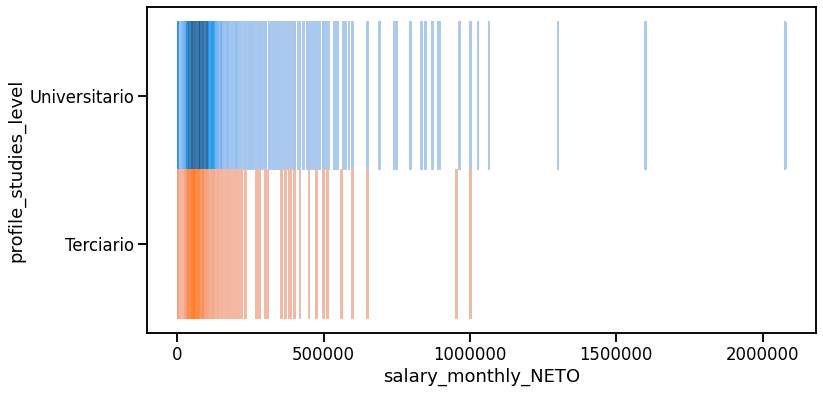

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
language_count[language_count['frequency']>500]
seaborn.histplot(filtered_df_studies_levels[filtered_df_studies_levels['salary_monthly_NETO']<200000], x='salary_monthly_NETO', y='profile_studies_level',
                 hue='profile_studies_level',legend=False)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:

variable=["Universitario"]
df_sel_col['salary_monthly_NETO'][df_sel_col.profile_studies_level.isin(variable)].mean()

97410.22441368081

In [ ]:
variable=["Terciario"]
df_sel_col['salary_monthly_NETO'][df_sel_col.profile_studies_level.isin(variable)].mean()

80814.43378390597

In [ ]:
#Revisisar la siguiente conclusión

Se observa que la distribución de los dos grupos seleccionados tiene comportamiento similar. Aunque sus medias difieren afectados por los encuestados “universitarios” que aportan al data set valores de salarios muy grandes.se consideran que las variables no son independientes.

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


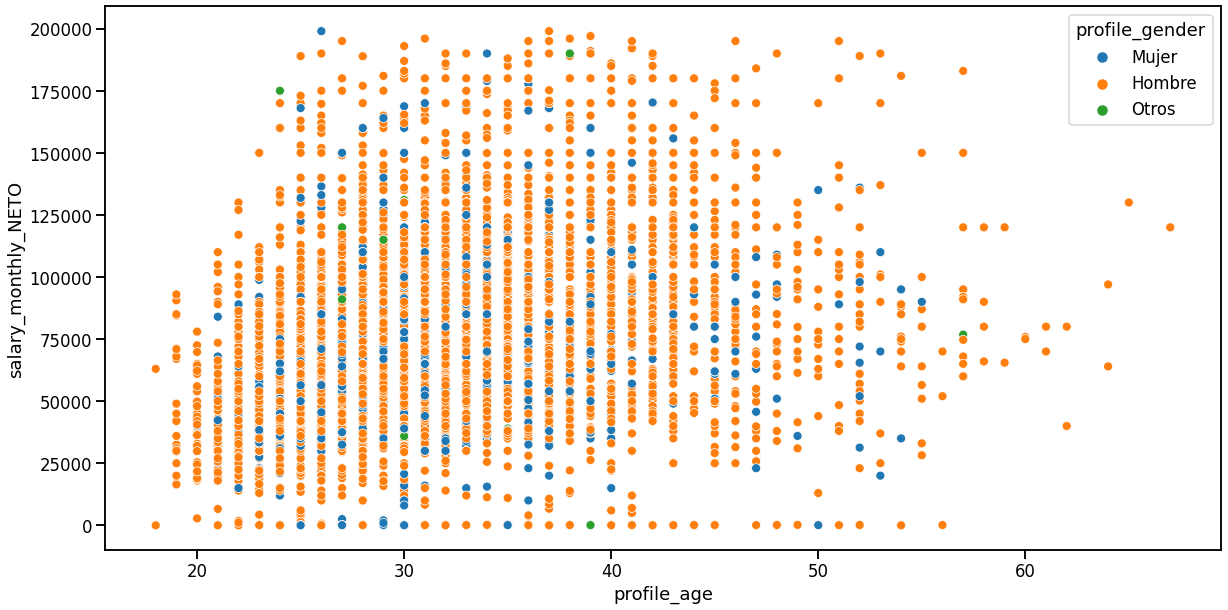

In [ ]:
#variable seleccionadas:profile_age,salary_monthly_NETO y profil_gender.
#para el analisis se creó una mascacara de menor a 70 años y sueldo neto menor a 200000

fig = plt.figure(figsize=(20,10))
mask = (df['profile_age'] < 70) & (df['salary_monthly_NETO'] < 200000)
seaborn.scatterplot(data=df[mask], x='profile_age', y='salary_monthly_NETO', hue='profile_gender'
#,size='work_years_in_company'
)

CONCLUSIÓN: Agregar de este ultimo gráfico.